In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import de la base
df = pd.read_csv("bpe19_ensemble_xy.csv", sep =";")

C:\Users\Utilisateur\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2607293 entries, 0 to 2607292
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   REG         int64  
 1   DEP         object 
 2   DEPCOM      object 
 3   DCIRIS      object 
 4   AN          int64  
 5   TYPEQU      object 
 6   LAMBERT_X   float64
 7   LAMBERT_Y   float64
 8   QUALITE_XY  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 179.0+ MB


In [5]:
df.isnull().sum(axis=0)

REG                0
DEP                0
DEPCOM             0
DCIRIS             0
AN                 0
TYPEQU             0
LAMBERT_X     136101
LAMBERT_Y     136101
QUALITE_XY         0
dtype: int64

In [6]:
#identification des lignes avec LAMBERT = Nan
df["nul"]=df["LAMBERT_X"].isna()

In [7]:
#df avec uniquement les valeurs Lambert nulles
nul = df[df["nul"]==True]

In [8]:
#comptage des équipements avec des coordonnées nulles
nul["TYPEQU"].value_counts()

A401    126931
B202      2584
B302       601
E101       567
F307       559
         ...  
A106         1
D236         1
B308         1
D302         1
D237         1
Name: TYPEQU, Length: 134, dtype: int64

In [9]:
#On va transformer en int les num de départements. Je choisis de supprimer les infos correspondant à 2A et 2B soit la corse
df=df[-((df["DEP"]=="2A")|(df["DEP"]=="2B"))]
df["DEP"]=df["DEP"].astype(int)

In [10]:
# On compte le nombre d'équipement par département
df["DEP"].value_counts()

75    139884
13     92670
59     78771
69     71652
93     69683
       ...  
52      6272
55      6208
23      4984
90      4488
48      4086
Name: DEP, Length: 99, dtype: int64

<AxesSubplot:xlabel='DEP', ylabel='count'>

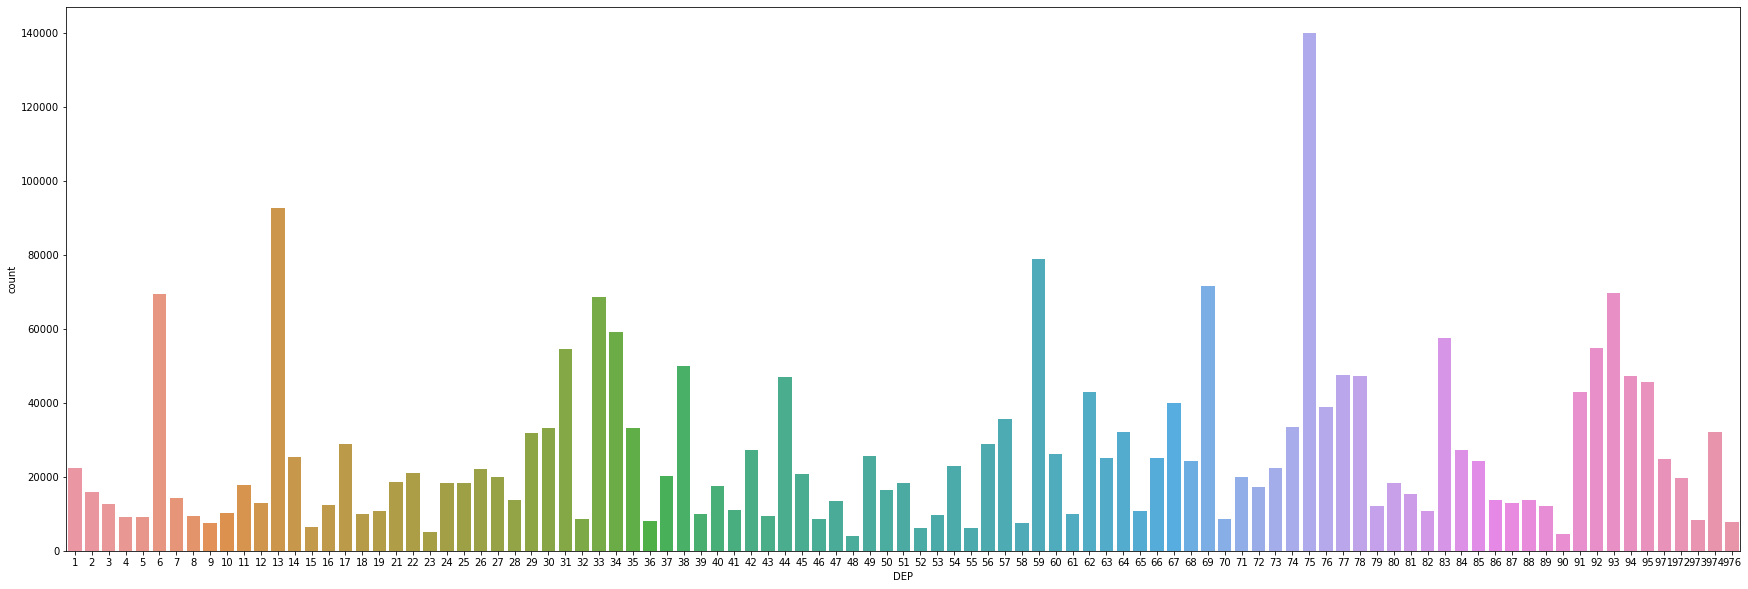

In [11]:
fig, ax = plt.subplots(figsize=(30,10))
sns.countplot(x="DEP", data = df)

<AxesSubplot:xlabel='TYPEQU', ylabel='count'>

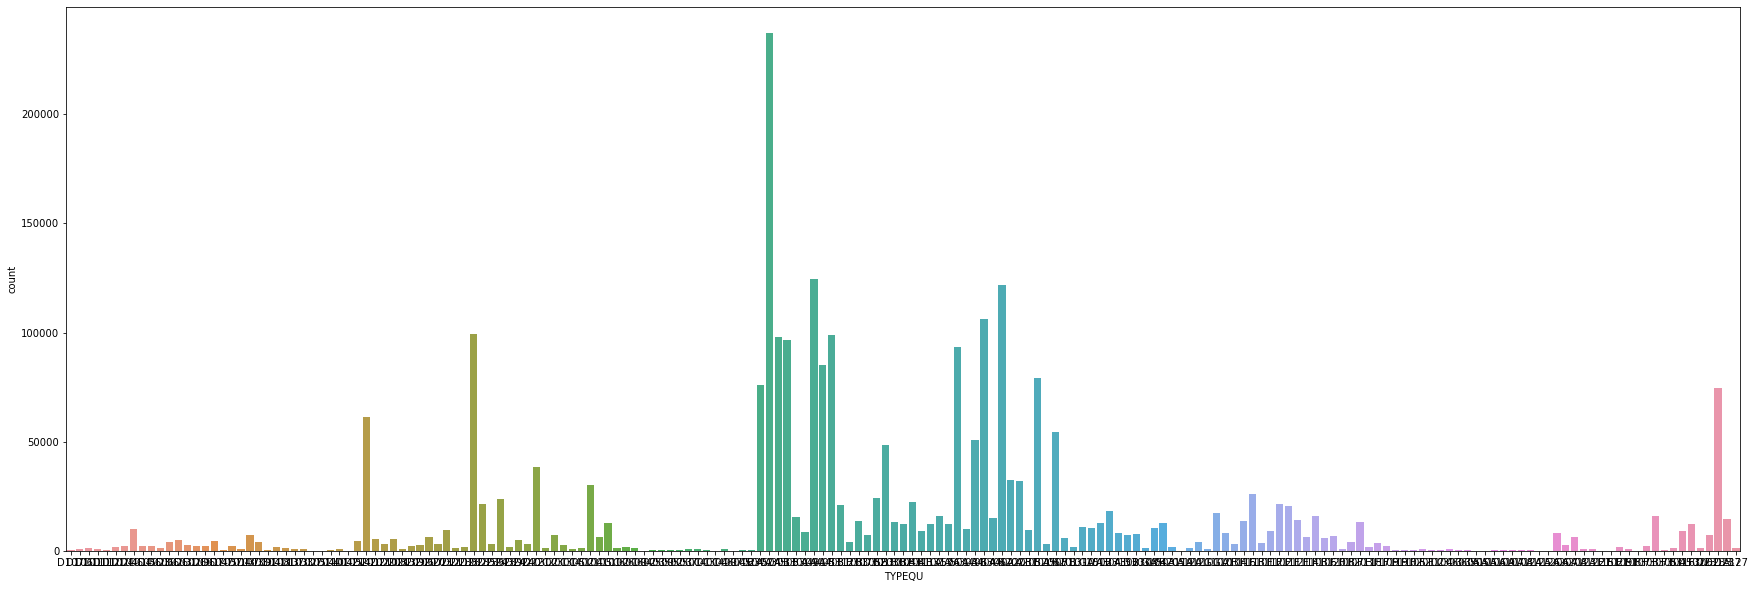

In [12]:
fig, ax = plt.subplots(figsize=(30,10))
sns.countplot(x="TYPEQU", data = df)

In [13]:
#Je décide de ne conserver que certains équipements
eqfin = ["A101", "A104", "A203", "A504", "B101", "B102", "B201", "B202", "B203", "C101", "C102", "C104", "C105", "C201", "C301", "C302", "C304", "C305", "C501", "C502", "C503", "C504", "C701", "C702","D101", "D102", "D103", "D106", "D107", "D301","D502", "E102", "E107", "E108", "E109", "F109","F121", "F201", "F202", "F303", "G102", "G103", "G104"]

In [14]:
df["EQFIN"] = df["TYPEQU"].apply(lambda row : row in eqfin)

In [15]:
df1 = df[df["EQFIN"]==True]

In [16]:
dic = {"A101" : "Police ou gendarmerie",
       "A104" : "Police ou gendarmerie",
       "A203" : "Banques",
       "A504" : "resto",
       "B101" : "Alimentation",
       "B102" : "Alimentation",
       "B201" : "Alimentation",
       "B202" : "Alimentation",
       "B203" : "Boulangerie",
       "C101" : "Ecole mat et primaire",
       "C102" : "Ecole mat et primaire",
       "C104" : "Ecole mat et primaire",
       "C105" : "Ecole mat et primaire",
       "C201" : "Collège ou lycée",
       "C301" : "Collège ou lycée",
       "C302" : "Collège ou lycée",
       "C303" : "Collège ou lycée",
       "C304" : "Collège ou lycée",
       "C305" : "Collège ou lycée",
       "C501" : "Ecole sup",
       "C502" : "Ecole sup",
       "C503" : "Ecole sup",
       "C504" : "Ecole sup",
       "C701" : "résidence U",
       "C702" : "resto U",
       "D101" : "Etab hospi",
       "D102" : "Etab hospi",
       "D103" : "Etab hospi",
       "D106" : "Etab hospi",
       "D107" : "Etab hospi",
       "D301" : "Pharmacie",
       "D502" : "Crèche",
       "E102" : "Aéroport",
       "E107" : "Gare nationale",
       "E108" : "Gare",
       "E109" : "Gare",
       "F109" : "Parcours sportif/santé",
       "F121" : "Salle multisport",
       "F201" : "Baignade",
       "F202" : "Port plaisance",
       "F303" : "Cinéma",
       "G102" : "Hotels",
       "G103" : "Camping",
       "G104" : "info touristique"       
      }

In [17]:
df1["EQ"] = df1["TYPEQU"].replace(dic)

<ipython-input-17-df7fe7adaefa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["EQ"] = df1["TYPEQU"].replace(dic)


<AxesSubplot:xlabel='EQ', ylabel='count'>

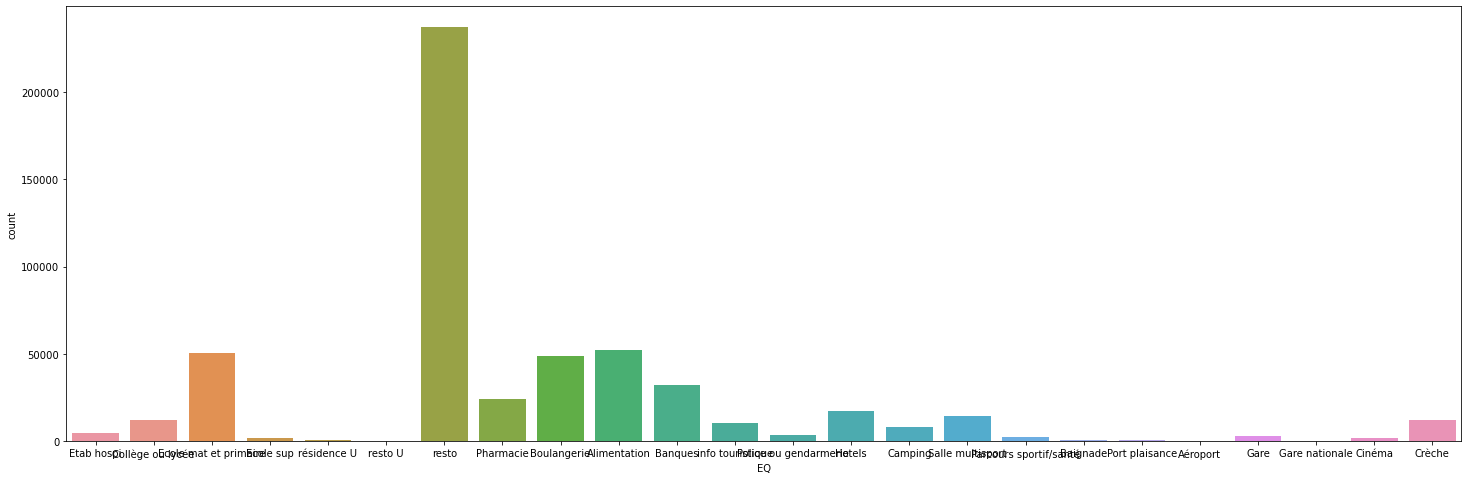

In [18]:
fig, ax = plt.subplots(figsize=(25,8))
sns.countplot(x="EQ", data = df1)

<AxesSubplot:xlabel='QUALITE_XY', ylabel='count'>

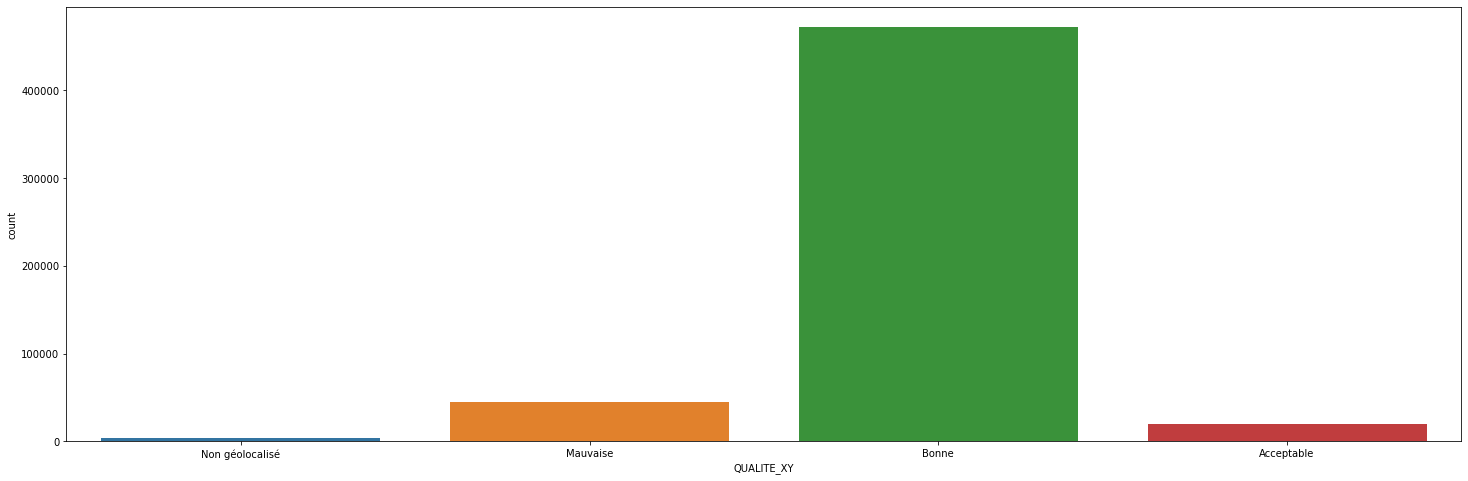

In [19]:
fig, ax = plt.subplots(figsize=(25,8))
sns.countplot(x="QUALITE_XY", data = df1)

In [20]:
pd.crosstab(df1["EQ"],df["DEP"])

DEP,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,971,972,973,974,976
EQ,,,,,,,,,,,,,,,,,,,,,
Alimentation,341,293,277,221,177,1180,281,161,151,207,...,847,1103,1795,1119,780,1218,608,393,1004,2650
Aéroport,0,0,0,0,0,2,0,0,0,1,...,0,0,1,1,1,1,1,4,2,1
Baignade,11,2,2,11,25,0,22,7,5,7,...,0,0,0,0,1,6,2,2,8,2
Banques,277,167,173,90,77,607,154,105,78,127,...,518,773,408,513,381,159,148,38,200,17
Boulangerie,407,342,302,182,173,981,328,233,165,219,...,658,853,1001,739,637,537,366,102,665,103
Camping,65,25,71,128,126,76,290,35,72,20,...,19,0,1,1,7,0,0,0,0,0
Cinéma,19,15,8,14,23,45,19,5,11,4,...,31,41,30,36,27,6,4,4,11,0
Collège ou lycée,102,123,74,39,26,179,64,62,34,57,...,205,243,300,256,237,100,100,61,161,44
Crèche,100,45,43,47,39,217,61,32,35,31,...,282,584,344,385,228,59,68,31,127,0


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540443 entries, 0 to 2507669
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   REG         540443 non-null  int64  
 1   DEP         540443 non-null  int32  
 2   DEPCOM      540443 non-null  object 
 3   DCIRIS      540443 non-null  object 
 4   AN          540443 non-null  int64  
 5   TYPEQU      540443 non-null  object 
 6   LAMBERT_X   536612 non-null  float64
 7   LAMBERT_Y   536612 non-null  float64
 8   QUALITE_XY  540443 non-null  object 
 9   nul         540443 non-null  bool   
 10  EQFIN       540443 non-null  bool   
 11  EQ          540443 non-null  object 
dtypes: bool(2), float64(2), int32(1), int64(2), object(5)
memory usage: 64.3+ MB


In [22]:
df1 = df1.dropna(axis = 0, how = "any")

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536612 entries, 27 to 2507669
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   REG         536612 non-null  int64  
 1   DEP         536612 non-null  int32  
 2   DEPCOM      536612 non-null  object 
 3   DCIRIS      536612 non-null  object 
 4   AN          536612 non-null  int64  
 5   TYPEQU      536612 non-null  object 
 6   LAMBERT_X   536612 non-null  float64
 7   LAMBERT_Y   536612 non-null  float64
 8   QUALITE_XY  536612 non-null  object 
 9   nul         536612 non-null  bool   
 10  EQFIN       536612 non-null  bool   
 11  EQ          536612 non-null  object 
dtypes: bool(2), float64(2), int32(1), int64(2), object(5)
memory usage: 44.0+ MB


In [27]:
df1.drop(["nul", "EQFIN"], axis = 1)

,REG,DEP,DEPCOM,DCIRIS,AN,TYPEQU,LAMBERT_X,LAMBERT_Y,QUALITE_XY,EQ
27,84,1,01053,01053_0402,2019,D106,871098.5,6569397.6,Mauvaise,Etab hospi
28,84,1,01053,01053_0402,2019,D101,871098.5,6569397.6,Mauvaise,Etab hospi
31,84,1,01034,01034_0102,2019,D101,908659.7,6521503.8,Bonne,Etab hospi
32,84,1,01034,01034_0102,2019,D102,908659.7,6521503.8,Bonne,Etab hospi
33,84,1,01034,01034_0102,2019,D106,908659.7,6521503.8,Bonne,Etab hospi
...,...,...,...,...,...,...,...,...,...,...
2507665,4,974,97411,97411_0111,2019,D502,339230.5,7689978.5,Bonne,Crèche
2507666,4,974,97415,97415_1501,2019,D502,320750.0,7665950.0,Mauvaise,Crèche
2507667,4,974,97415,97415_1702,2019,D502,324350.0,7671650.0,Mauvaise,Crèche
2507668,4,974,97414,97414_0107,2019,D502,337650.0,7646350.0,Mauvaise,Crèche


In [28]:
df1.to_csv("base_equipements.csv")